In [296]:
import tensorflow as tf

In [297]:
sess = tf.Session()

In [298]:
t = [[1,2,3],[4,5,6],[7,8,9]]
t

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [299]:
m = tf.Variable(30,tf.int32)
m

<tf.Variable 'Variable_27:0' shape=() dtype=int32_ref>

In [300]:
tf.rank(m)

<tf.Tensor 'Rank_63:0' shape=() dtype=int32>

In [301]:
# rank :0 : Scalar 
# rank :1 : Vector v = [1.1,2.2,3.3]
# rank : 2 : metrix m = [[1,2,3],[4,5,6],[7,8,9]]
# rank : 3 : 3-tensor (cube of numbers)



In [302]:
rank_tensor = tf.ones([3,4])
rank_tensor

<tf.Tensor 'ones_10:0' shape=(3, 4) dtype=float32>

In [303]:
sess.run([rank_tensor])

[array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=float32)]

In [304]:
# 4행 5열 3면 1이 들어있는 tensor : 면 , 행 ,열 

In [305]:
rank3_tensor = tf.ones([3,4,5])
rank3_tensor

<tf.Tensor 'ones_11:0' shape=(3, 4, 5) dtype=float32>

In [306]:
sess.run(rank3_tensor)

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]], dtype=float32)

In [307]:
m = tf.reshape(rank3_tensor ,[6,10])
m

<tf.Tensor 'Reshape_5:0' shape=(6, 10) dtype=float32>

In [308]:
sess.run(m)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

In [309]:
from IPython.display import Image

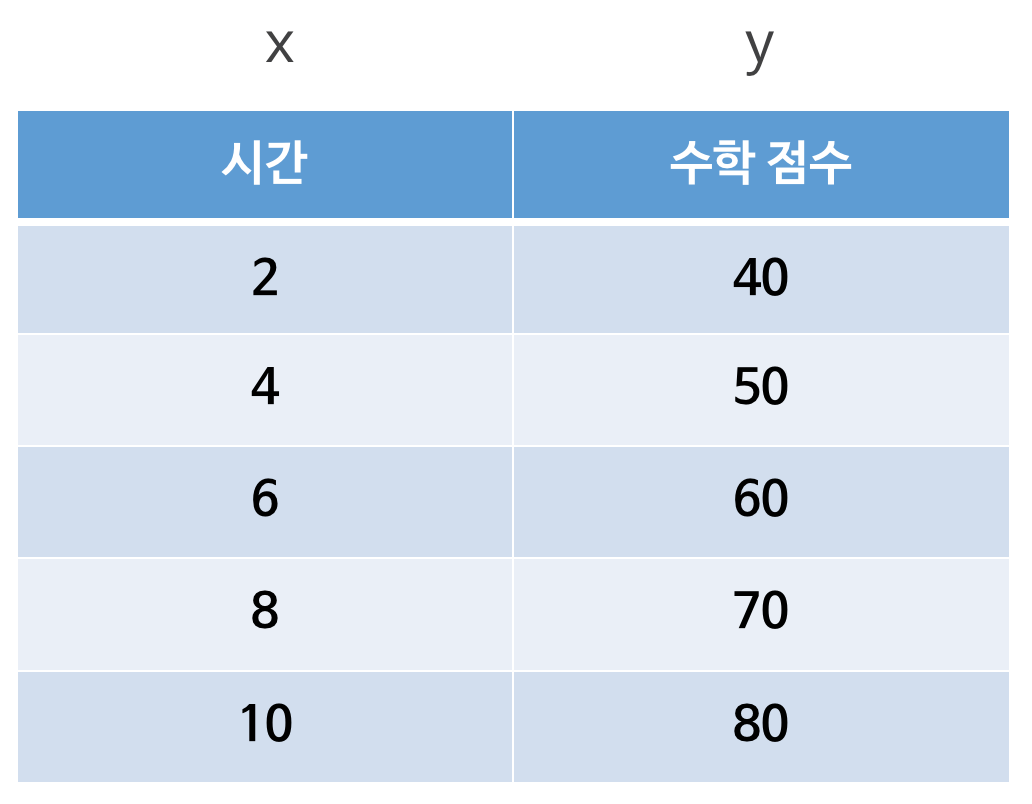

In [310]:
Image('data.png',height = 200 , width =400)

In [311]:
# y = w*x + b 식을 연산 
x = tf.placeholder(tf.float32)

#아직 정해지지는 않았지만 일단 값을 하나씩 부여
W = tf.Variable([0.3],tf.float32)
b = tf.Variable([-0.3], tf.float32)

#선형모형
linear_model = W*x + b 
#반드시 초기화 작업 
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

print(sess.run(W))
print(sess.run(b))



[0.3]
[-0.3]


In [312]:
sess.run(linear_model , feed_dict={x:[2,4,6,8,10]})

array([0.3       , 0.90000004, 1.5       , 2.1000001 , 2.7       ],
      dtype=float32)

In [313]:
y = tf.placeholder(tf.float32)
#모델의 예측값과 실제 결과값의 차이 

squared_deltas = tf.square(linear_model-y)
squared_deltas 

<tf.Tensor 'Square_61:0' shape=<unknown> dtype=float32>

In [314]:
loss = tf.reduce_mean(squared_deltas)

# loss 를 최소화 할 수 있는 W,b 
sess.run(loss,feed_dict = {x :[2,4,6,8,10], y: [40,50,60,70,80]})

3598.97

In [315]:
import matplotlib.pyplot as plt 
%matplotlib inline

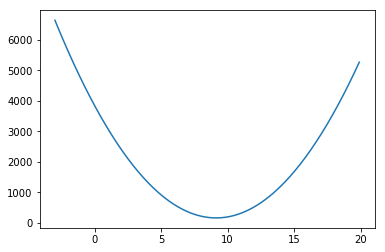

In [316]:
x1 = [ 2,4,6,8,10]
y1 = [ 40,50,60,70,80]

w = tf.placeholder(tf.float32)
loss = tf.reduce_mean(tf.square(w*x1+b -y1))

sess = tf.Session()
sess.run(tf.global_variables_initializer())
#W의 변화에 따른 loss에 변환을 그래프로 그려보고자 한다 

wList = []
lossList = []

for i in range(-30,200):
    feed_w = i*0.1
    curr_loss , curr_w = sess.run([loss,w],feed_dict=({w: feed_w}))
    wList.append(curr_w)
    lossList.append(curr_loss)
    
plt.plot(wList,lossList)
plt.show()

In [317]:
#loss 값이 최소화 될 수 있는  w,b를 구하면 된다 
#최소값을 구하기 위해서 경사 감소 알고리즘(Gradient Desceint Algorism)

In [318]:
squared_deltas = tf.square(linear_model -y)
loss = tf.reduce_mean(squared_deltas)

optimizer = tf.train.GradientDescentOptimizer(0.01)


In [319]:
train = optimizer.minimize(loss) 
print(train)

name: "GradientDescent_28"
op: "NoOp"
input: "^GradientDescent_28/update_Variable_28/ApplyGradientDescent"
input: "^GradientDescent_28/update_Variable_29/ApplyGradientDescent"



In [320]:
sess.run(tf.global_variables_initializer())  #초기화 필요함 , 오류값나오는거 방지 

In [321]:
for i in range(1000):
    sess.run(train,feed_dict ={x :[2,4,6,8,10], y : [40,50,60,70,80]})
print(sess.run([W,b]))

[array([5.1115417], dtype=float32), array([29.185345], dtype=float32)]


In [322]:
# W = 5.1115417 , b = 29.185345
print(5.1115417*2+29.185345)
print(5.1115417*4+29.185345)
print(5.1115417*6+29.185345)
print(5.1115417*8+29.185345)
print(5.1115417*10+29.185345)




39.408428400000005
49.6315118
59.854595200000006
70.0776786
80.300762


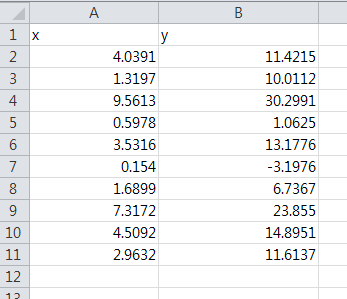

In [323]:
Image('hw1.png')

In [324]:
x2= [4.0391,1.3197,9.5613,0.5978,3.5316,0.154,1.6899,7.3172,4.5092,2.9632]
y2= [11.4215,10.0112,30.2991,1.0625,13.1776,-3.1976,6.7367,23.855,14.8951,11.6137]

w = tf.Variable(tf.random_normal([1],-5.0,5.0))
b = tf.Variable(tf.random_normal([1],-5.0,5.0))

x = tf.placeholder(tf.float32)               
y = tf.placeholder(tf.float32)
                
model = w*x + b 
                
loss = tf.reduce_mean(tf.square(model -y))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
print(train)         
                
                
# sess = tf.Session()
# sess.run(tf.global_variables_initializer())
# #W의 변화에 따른 loss에 변환을 그래프로 그려보고자 한다 

# wList = []
# lossList = []

# for i in range(-30,200):
#     feed_w = i*0.1
#     curr_loss , curr_w = sess.run([loss,w],feed_dict=({w: feed_w}))
#     wList.append(curr_w)
#     lossList.append(curr_loss)
    
# plt.plot(wList,lossList)
# plt.show()


name: "GradientDescent_29"
op: "NoOp"
input: "^GradientDescent_29/update_Variable_30/ApplyGradientDescent"
input: "^GradientDescent_29/update_Variable_31/ApplyGradientDescent"



In [325]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    loss_val , model_val, _ = sess.run([loss,model,train], 
                                       feed_dict = {x:x2 , y:y2})
    if step %10 ==0:
        print('loss : ', loss_val,'model : ', model_val)

sess.run([w,b])



loss :  3270.9363 model :  [-38.520275 -15.305231 -85.66233   -9.142498 -34.187836  -5.353854
 -18.465565 -66.504845 -42.533436 -29.335505]
loss :  1075.157 model :  [-16.573864   -7.508668  -34.982273   -5.102194  -14.882099   -3.6227741
  -8.742741  -27.501503  -18.140955  -12.987322 ]
loss :  357.09717 model :  [-4.0215263 -3.043971  -6.0066175 -2.7844665 -3.8390932 -2.6249316
 -3.1770487 -5.1999207 -4.1905155 -3.6347678]
loss :  122.26182 model :  [ 3.158842   -0.48463237 10.55753    -1.4518398   2.478889   -2.0464466
  0.0113647   7.550867    3.7886858   1.7173424 ]
loss :  45.444454 model :  [ 7.267259    0.9850905  20.024261   -0.68259263  6.094868   -1.7078285
  1.8403008  14.840097    8.3532505   4.78179   ]
loss :  20.300394 model :  [ 9.6189785   1.831675   25.432411   -0.23556554  8.165695   -1.506436
  2.8917837  19.006182   10.965162    6.5380197 ]
loss :  12.054227 model :  [ 1.09661207e+01  2.32187510e+00  2.85197182e+01  2.71481276e-02
  9.35291386e+00 -1.38357341e+00 

loss :  5.7534065 model :  [13.387999   4.6070137 31.219267   2.2759879 11.749272   0.8429507
  5.8023953 23.973034  14.905958   9.9139   ]
loss :  5.7528176 model :  [13.388703   4.6088557 31.21766    2.2781317 11.75019    0.8452803
  5.8040824 23.972366  14.9064665  9.915055 ]
loss :  5.7522383 model :  [13.3894005   4.6106834  31.216064    2.2802591  11.751098    0.84759235
  5.805756   23.971703   14.906968    9.9162    ]
loss :  5.751667 model :  [13.390094   4.6124973 31.21448    2.282371  11.752001   0.849887
  5.8074174 23.971043  14.907468   9.917336 ]
loss :  5.751105 model :  [13.390781   4.614298  31.212908   2.2844667 11.752895   0.8521644
  5.809067  23.97039   14.907963   9.918465 ]
loss :  5.7505503 model :  [13.391462   4.6160846 31.211348   2.2865467 11.753783   0.8544246
  5.8107033 23.96974   14.908454   9.919583 ]
loss :  5.7500057 model :  [13.39214    4.6178575 31.209799   2.288611  11.754665   0.8566679
  5.812327  23.969095  14.908941   9.920694 ]
loss :  5.749

  5.987436  23.899647  14.961526  10.040466 ]
loss :  5.7153234 model :  [13.465277   4.809377  31.04254    2.5115561 11.849895   1.0989327
  5.9877305 23.899529  14.961614  10.040668 ]
loss :  5.715306 model :  [13.4654     4.8096967 31.042263   2.5119283 11.850055   1.0993369
  5.9880233 23.899414  14.961702  10.040869 ]
loss :  5.715289 model :  [13.465521   4.810014  31.041986   2.5122976 11.850212   1.0997381
  5.9883137 23.8993    14.96179   10.041067 ]
loss :  5.715272 model :  [13.465641   4.8103285 31.041714   2.5126638 11.8503685  1.1001362
  5.9886026 23.899187  14.961876  10.041265 ]
loss :  5.715255 model :  [13.46576    4.810641  31.04144    2.5130274 11.850524   1.1005312
  5.9888883 23.89907   14.961963  10.04146  ]
loss :  5.715238 model :  [13.4658785  4.8109508 31.041168   2.5133882 11.850678   1.1009234
  5.989172  23.898958  14.962048  10.041655 ]
loss :  5.715221 model :  [13.465997   4.811259  31.040897   2.5137465 11.850831   1.1013126
  5.989454  23.898846  14.

loss :  5.714169 model :  [13.479025   4.845374  31.011106   2.5534594 11.867795   1.144467
  6.0206985 23.886456  14.971515  10.063218 ]
loss :  5.7141695 model :  [13.479042   4.8454227 31.011063   2.5535161 11.867818   1.1445286
  6.0207424 23.886436  14.971527  10.063248 ]
loss :  5.7141695 model :  [13.479061   4.8454704 31.01102    2.5535724 11.867842   1.1445898
  6.020787  23.88642   14.97154   10.063278 ]
loss :  5.714168 model :  [13.479079   4.8455186 31.010979   2.5536284 11.8678665  1.1446506
  6.020831  23.886402  14.971555  10.063309 ]
loss :  5.7141685 model :  [13.479098   4.8455663 31.010937   2.553684  11.86789    1.1447109
  6.0208745 23.886385  14.971568  10.063338 ]
loss :  5.7141676 model :  [13.4791155  4.845614  31.010897   2.553739  11.867913   1.1447709
  6.020918  23.88637   14.9715805 10.063368 ]
loss :  5.714168 model :  [13.479134   4.8456607 31.010857   2.5537937 11.867937   1.1448302
  6.020961  23.886353  14.971593  10.063397 ]
loss :  5.7141676 model 

loss :  5.714143 model :  [13.481125   4.850874  31.006306   2.5598621 11.87053    1.1514244
  6.025736  23.88446   14.973028  10.066664 ]
loss :  5.714143 model :  [13.481127   4.850881  31.006296   2.5598705 11.870532   1.1514337
  6.025742  23.884455  14.973029  10.066668 ]
loss :  5.714143 model :  [13.48113    4.8508883 31.00629    2.559879  11.870536   1.151443
  6.0257487 23.884453  14.973031  10.066672 ]
loss :  5.714143 model :  [13.4811325  4.850896  31.006283   2.5598874 11.87054    1.1514522
  6.0257554 23.884449  14.973033  10.066676 ]
loss :  5.714142 model :  [13.481135   4.850903  31.006275   2.559896  11.8705435  1.1514614
  6.025762  23.884445  14.973035  10.066681 ]
loss :  5.714143 model :  [13.481138   4.8509097 31.00627    2.559904  11.870547   1.1514704
  6.0257683 23.884443  14.973037  10.066686 ]
loss :  5.714142 model :  [13.48114    4.8509173 31.006262   2.5599124 11.87055    1.1514794
  6.0257754 23.88444   14.973038  10.0666895]
loss :  5.714143 model :  [1

loss :  5.714142 model :  [13.481443   4.851707  31.005577   2.5608318 11.870945   1.1524781
  6.026499  23.884155  14.973257  10.067186 ]
loss :  5.714142 model :  [13.481444   4.8517084 31.005577   2.560833  11.870945   1.1524795
  6.0264997 23.884157  14.973258  10.067186 ]
loss :  5.714142 model :  [13.481443   4.851709  31.005573   2.5608342 11.870945   1.1524808
  6.0265    23.884155  14.973257  10.067186 ]
loss :  5.7141414 model :  [13.481444   4.8517103 31.005573   2.5608354 11.870945   1.1524823
  6.0265017 23.884155  14.973257  10.067187 ]
loss :  5.7141423 model :  [13.481445   4.8517113 31.005571   2.5608368 11.870945   1.1524837
  6.0265026 23.884153  14.973257  10.067188 ]
loss :  5.7141423 model :  [13.481445   4.851712  31.005571   2.5608382 11.870946   1.152485
  6.0265036 23.884153  14.973258  10.067188 ]
loss :  5.7141423 model :  [13.481445   4.8517137 31.00557    2.5608394 11.870946   1.1524863
  6.0265045 23.884153  14.973258  10.067188 ]
loss :  5.7141414 model 

loss :  5.714142 model :  [13.481492   4.8518333 31.005466   2.560979  11.871007   1.1526382
  6.0266147 23.88411   14.973291  10.067265 ]
loss :  5.714143 model :  [13.481492   4.8518333 31.005466   2.5609794 11.871007   1.1526384
  6.026615  23.884111  14.973291  10.067265 ]
loss :  5.7141423 model :  [13.481491   4.851834  31.005465   2.5609794 11.871006   1.1526386
  6.0266147 23.88411   14.97329   10.067264 ]
loss :  5.7141423 model :  [13.481492   4.851834  31.005465   2.5609796 11.871007   1.1526388
  6.0266147 23.88411   14.973291  10.067265 ]
loss :  5.714142 model :  [13.481492   4.8518343 31.005465   2.5609798 11.871007   1.1526389
  6.026615  23.88411   14.973291  10.067265 ]
loss :  5.714142 model :  [13.481492   4.8518343 31.005465   2.5609798 11.871007   1.1526392
  6.026615  23.88411   14.973291  10.067265 ]
loss :  5.7141423 model :  [13.481492   4.8518343 31.005465   2.56098   11.871007   1.1526394
  6.026615  23.88411   14.973291  10.067265 ]
loss :  5.7141423 model 

loss :  5.7141423 model :  [13.481499   4.8518515 31.005451   2.561     11.8710165  1.152661
  6.026631  23.884104  14.973297  10.067276 ]
loss :  5.7141423 model :  [13.481499   4.8518515 31.005451   2.561     11.8710165  1.152661
  6.026631  23.884104  14.973297  10.067276 ]
loss :  5.7141423 model :  [13.481499   4.8518515 31.005451   2.561     11.8710165  1.152661
  6.026631  23.884104  14.973297  10.067276 ]
loss :  5.7141423 model :  [13.481499   4.8518515 31.005451   2.561     11.8710165  1.152661
  6.026631  23.884104  14.973297  10.067276 ]
loss :  5.7141423 model :  [13.481499   4.8518515 31.005451   2.561     11.8710165  1.152661
  6.026631  23.884104  14.973297  10.067276 ]
loss :  5.7141423 model :  [13.481499   4.8518515 31.005451   2.561     11.8710165  1.152661
  6.026631  23.884104  14.973297  10.067276 ]
loss :  5.7141423 model :  [13.481499   4.8518515 31.005451   2.561     11.8710165  1.152661
  6.026631  23.884104  14.973297  10.067276 ]
loss :  5.7141423 model :  

[array([3.1733642], dtype=float32), array([0.6639629], dtype=float32)]

In [326]:
squared_deltas = tf.square(linear_model -y)
loss = tf.reduce_mean(squared_deltas)

optimizer = tf.train.GradientDescentOptimizer(0.01)


In [327]:
train = optimizer.minimize(loss) 
print(train)

name: "GradientDescent_30"
op: "NoOp"
input: "^GradientDescent_30/update_Variable_28/ApplyGradientDescent"
input: "^GradientDescent_30/update_Variable_29/ApplyGradientDescent"



In [328]:
sess.run(tf.global_variables_initializer()) 

In [345]:
x2 = [ 4.0391, 1.3197, 9.5613, 0.5978, 3.5316, 0.154, 1.6899, 7.3172, 4.5092, 2.9632]
y2 = [ 11.4215, 10.0112, 30.2991, 1.0625, 13.1776, -3.1976, 6.7367, 23.855, 14.8951, 11.6137]

In [346]:
w = tf.placeholder(tf.float32)
loss = tf.reduce_mean(tf.square(w*x2+b -y2))

sess = tf.Session()
sess.run(tf.global_variables_initializer())
#W의 변화에 따른 loss에 변환을 그래프로 그려보고자 한다 


In [347]:
wList = []
lossList = []

for i in range(-30,200):
    feed_w = i*0.1
    curr_loss , curr_w = sess.run([loss,w],feed_dict=({w: feed_w}))
    wList.append(curr_w)
    lossList.append(curr_loss)
    

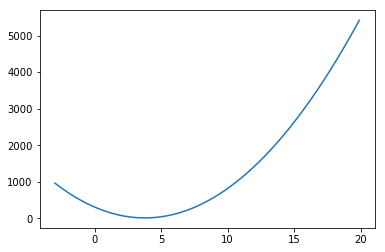

In [348]:
plt.plot(wList,lossList)
plt.show()

In [349]:
squared_deltas = tf.square(linear_model -y)
loss = tf.reduce_mean(squared_deltas)

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss) 
print(train)

name: "GradientDescent_35"
op: "NoOp"
input: "^GradientDescent_35/update_Variable_28/ApplyGradientDescent"
input: "^GradientDescent_35/update_Variable_29/ApplyGradientDescent"



In [350]:
sess.run(tf.global_variables_initializer())  #초기화 필요함 , 오류값나오는거 방지

In [351]:
for i in range(1000):
    sess.run(train,feed_dict ={x :[4.0391,1.3197,9.5613,0.5978,3.5316,0.154,1.6899,7.3172,4.5092,2.9632], 
                               y : [11.4215,10.0112,30.2991,1.0625,13.1776,-3.1976,6.7367,23.855,14.8951,11.6137]
                              })
print(sess.run([W,b]))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_46' with dtype float
	 [[Node: Placeholder_46 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_46', defined at:
  File "C:\Users\user\anaconda3\envs\bigdata\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\user\anaconda3\envs\bigdata\lib\asyncio\base_events.py", line 421, in run_forever
    self._run_once()
  File "C:\Users\user\anaconda3\envs\bigdata\lib\asyncio\base_events.py", line 1425, in _run_once
    handle._run()
  File "C:\Users\user\anaconda3\envs\bigdata\lib\asyncio\events.py", line 127, in _run
    self._callback(*self._args)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\tornado\platform\asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\IPython\core\interactiveshell.py", line 2714, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\IPython\core\interactiveshell.py", line 2818, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\IPython\core\interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-311-2d1f920220f2>", line 2, in <module>
    x = tf.placeholder(tf.float32)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1735, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 4924, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_46' with dtype float
	 [[Node: Placeholder_46 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
